In [4]:
from similarities.text_similarities import levenshtein_similarity
from data.prepare_word2vec_ed import create_edit_similarity_matrix, get_word2vec_items
from data.prepare_data import *
from gensim.models import Word2Vec

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [5]:
model = Word2Vec.load('utils/word2vec.model')
slova_po_b = pd.read_csv('data/processed/vyjmenovana_slova_po_b.csv')
X, data = get_word2vec_items(model, slova_po_b)

In [6]:
vyjm_slova_filtered = slova_po_b.loc[slova_po_b['question'].isin(data['question'])]
correctness_matrix = reshape_to_correctness_matrix(vyjm_slova_filtered)
similarity_matrix = correctness_matrix_to_similarity_matrix('doublepearson', correctness_matrix)
similarity_matrix2 = correctness_matrix_to_similarity_matrix('pearson', correctness_matrix)
edit_similarity_matrix = pd.read_csv('data/processed/levenshtein_similarity_matrix_slova-po-b.csv', index_col=0)
word2vec_similarity_matrix = pd.read_csv('data/processed/word2vec_similarity_matrix_slova-po-b.csv', index_col=0)

In [7]:
similarities = pd.DataFrame()
similarities['dpearson'] = similarity_matrix.values.flatten()
similarities['pearson'] = similarity_matrix2.values.flatten()
similarities['word2vec'] = word2vec_similarity_matrix.values.flatten()
similarities['lev1'] = edit_similarity_matrix.values.flatten().astype(float)
similarities_final = similarities.corr()

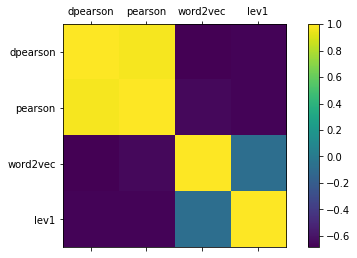

In [8]:
plt.matshow(similarities_final.corr())
plt.gcf().set_size_inches(8, 4)
plt.xticks(range(len(similarities_final.columns)), similarities_final.columns)
plt.yticks(range(len(similarities_final.columns)), similarities_final.columns)
plt.colorbar()
plt.show()

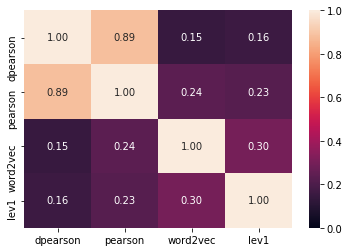

In [9]:
sns.heatmap(similarities_final, annot=True, fmt=".2f", vmin=0)
plt.show()

In [10]:
def jaccard(x, y):
    d = ((x==1) & (y==1)).sum()
    b = ((x==1) & (y==0)).sum()
    c = ((x==0) & (y==1)).sum()
    a = ((x==0) & (y==0)).sum()
    return a / (a + b + c)

In [11]:
jaccard(correctness_matrix[1], correctness_matrix[2])

0.1437125748502994